In [1]:
# packages gerais
import pandas as pd
import joblib

# df_sales_ dataset
df_sales_filtered_2019 = joblib.load('df_sales_filtered_2019.pkl')


## 1 Create a date field based in Year and Week of the year

### 1.1 But the date to make sense should be the last day in that specific week

In [2]:
import datetime
# Function to get the last day of the week using ISO calendar
def get_last_day_of_iso_week(year, week):
    first_day_of_year = datetime.datetime(year, 1, 4)  # 4th January is always in the first ISO week
    first_monday_of_year = first_day_of_year - datetime.timedelta(days=first_day_of_year.weekday())
    week_start_date = first_monday_of_year + datetime.timedelta(weeks=week-1)
    return week_start_date + datetime.timedelta(days=6)

# Applying function to DataFrame
df_sales_filtered_2019['last_day_of_week'] = df_sales_filtered_2019.apply(
    lambda x: get_last_day_of_iso_week(x['year'], x['week']), axis=1
)

In [3]:
df_sales_filtered_2019 = df_sales_filtered_2019[
    (df_sales_filtered_2019['store_id'].isin(['S0085', 'S0020', 'S0097', 'S0062'])) & 
    (df_sales_filtered_2019['product_id'].isin(['P0103', 'P0388', 'P0051', 'P0336', 'P0500']))
]

df_sales_filtered_2019

,store_id,product_id,year,week,sales,revenue,stock,price,last_day_of_week
600,S0020,P0051,2019,1,29.0,26.86,218.0,1.00,2019-01-06
601,S0020,P0051,2019,2,50.0,46.30,217.0,1.00,2019-01-13
602,S0020,P0051,2019,3,57.0,52.79,202.0,1.00,2019-01-20
603,S0020,P0051,2019,4,60.0,55.56,142.0,1.00,2019-01-27
604,S0020,P0051,2019,5,66.0,55.56,196.0,1.00,2019-02-03
...,...,...,...,...,...,...,...,...,...
49492,S0097,P0500,2019,35,77.0,714.09,44.0,11.35,2019-09-01
49493,S0097,P0500,2019,36,39.0,373.33,81.0,11.35,2019-09-08
49494,S0097,P0500,2019,37,52.0,541.10,86.0,11.35,2019-09-15
49495,S0097,P0500,2019,38,37.0,411.12,79.0,11.35,2019-09-22


### 1.2 Convert date to time series by set as index and sort that

In [4]:
# Set 'date' column as index and sort by date
df_sales_filtered_2019.set_index('last_day_of_week', inplace=True)
df_sales_filtered_2019.sort_index(inplace=True)

In [5]:
df_sales_filtered_2019

,store_id,product_id,year,week,sales,revenue,stock,price
last_day_of_week,,,,,,,,
2019-01-06,S0020,P0051,2019,1,29.0,26.86,218.0,1.00
2019-01-06,S0020,P0388,2019,1,94.0,141.00,19.0,1.50
2019-01-06,S0020,P0500,2019,1,15.0,166.65,33.0,12.00
2019-01-06,S0062,P0051,2019,1,11.0,10.18,116.0,1.00
2019-01-06,S0062,P0103,2019,1,33.0,120.70,102.0,3.95
...,...,...,...,...,...,...,...,...
2019-09-29,S0062,P0103,2019,39,54.0,212.50,102.0,4.25
2019-09-29,S0020,P0388,2019,39,123.0,184.50,21.0,1.50
2019-09-29,S0097,P0388,2019,39,71.0,106.50,15.0,1.50


### 1.3 Prepare to apply ARIMA

In [6]:
# Group by 'store_id' and 'product_id'
grouped = df_sales_filtered_2019.groupby(['store_id', 'product_id'])

# Create a DataFrame to store forecasts and a data frame to have those product/store with error
df_forecasts = pd.DataFrame(columns=['store_id', 'product_id', 'forecast_week_1', 'forecast_week_2', 'forecast_week_3'])
df_product_error = pd.DataFrame(columns=['store_id', 'product_id', 'error_message'])

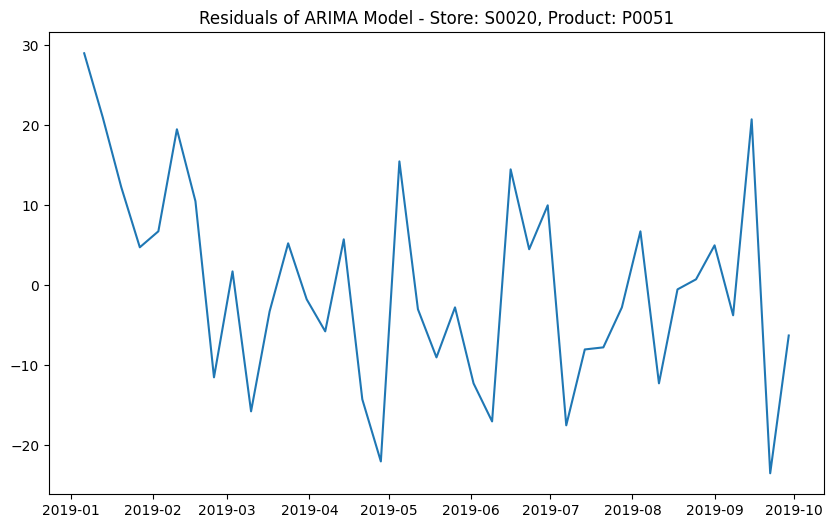

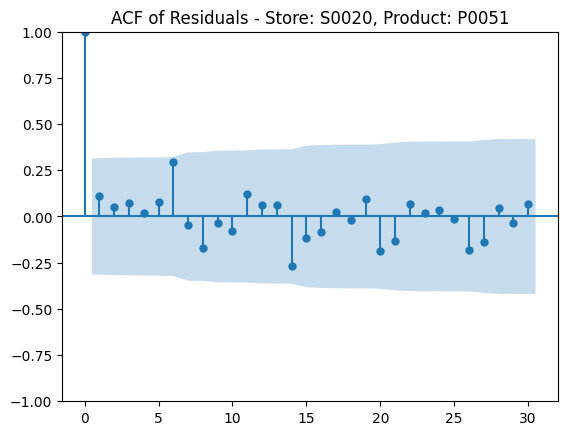

Ljung-Box test for Store: S0020, Product: P0051
      lb_stat  lb_pvalue
10  7.355422   0.691519


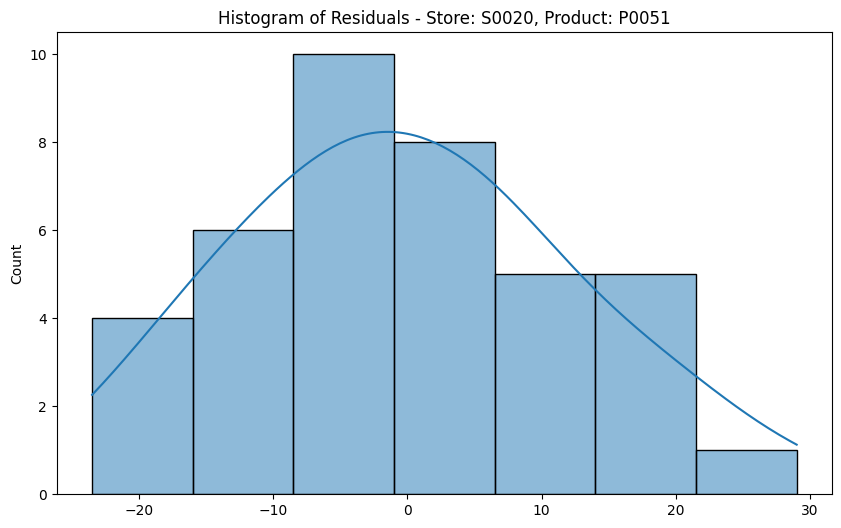

Jarque-Bera test for Store: S0020, Product: P0051
 (0.7227269529502862, 0.6967257090324253, 0.2265400571887675, 2.510639746275766)


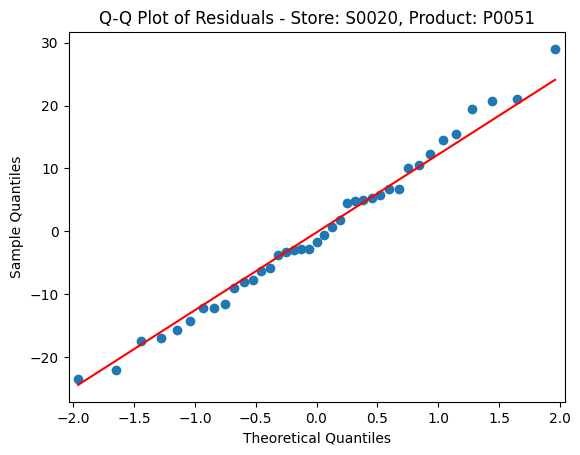

Arch test for Store: S0020, Product: P0051
 (7.682887646162989, 0.36138511035552384, 1.083242479175469, 0.40427011094324133)


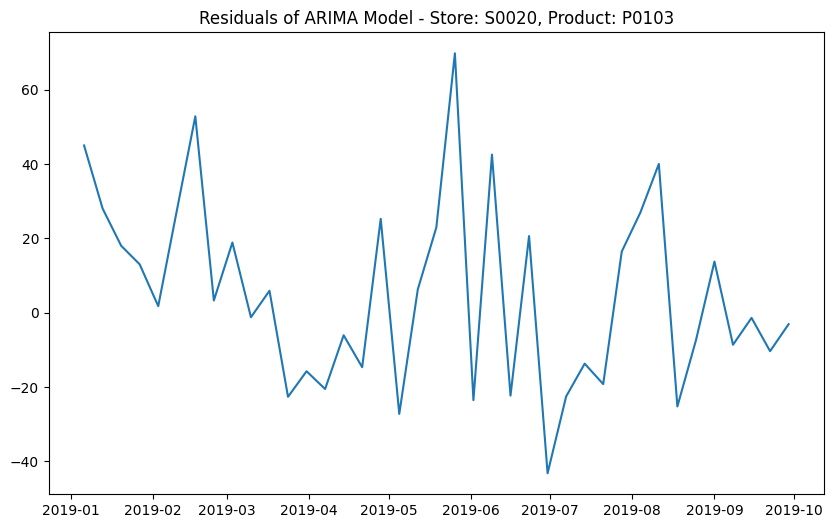

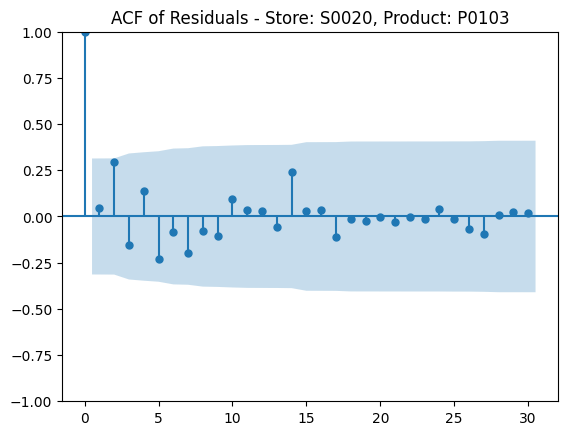

Ljung-Box test for Store: S0020, Product: P0103
       lb_stat  lb_pvalue
10  11.990934   0.285664


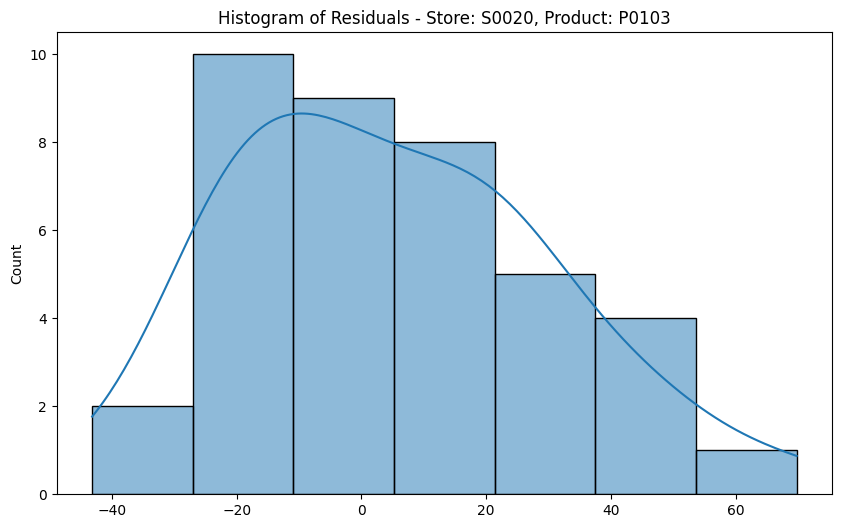

Jarque-Bera test for Store: S0020, Product: P0103
 (1.583104832071696, 0.4531407859434552, 0.4686637048959321, 2.6907498018580402)


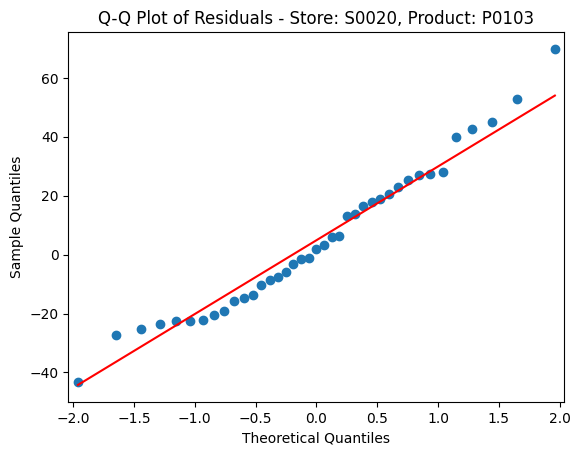

Arch test for Store: S0020, Product: P0103
 (2.5534518955399577, 0.9230185896849924, 0.2973079283256922, 0.9481764718318672)


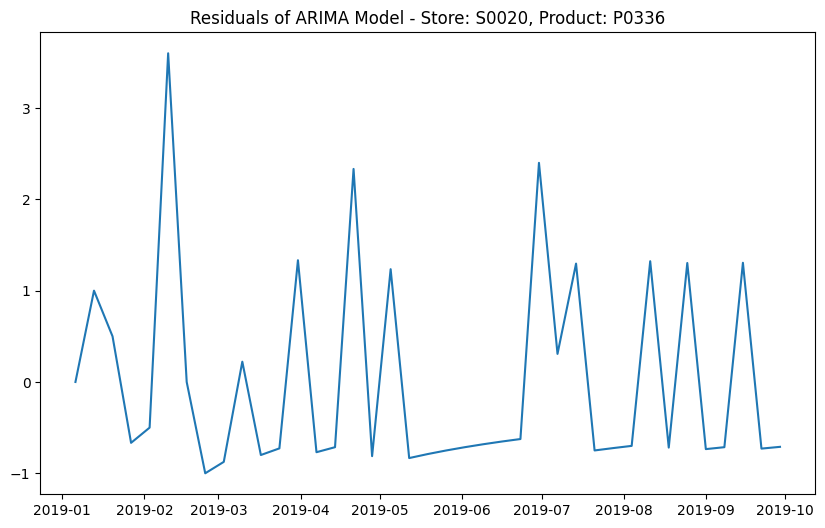

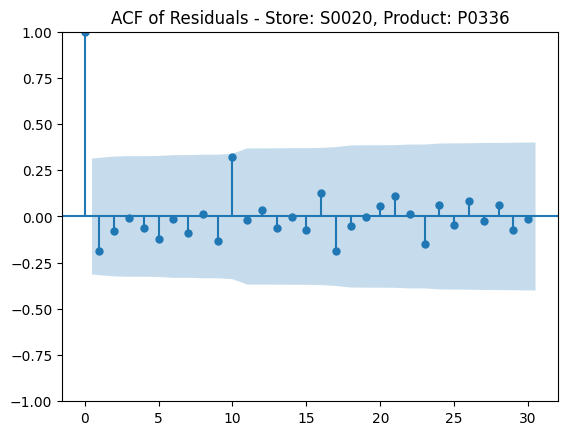

Ljung-Box test for Store: S0020, Product: P0336
     lb_stat  lb_pvalue
10  9.66339   0.470505


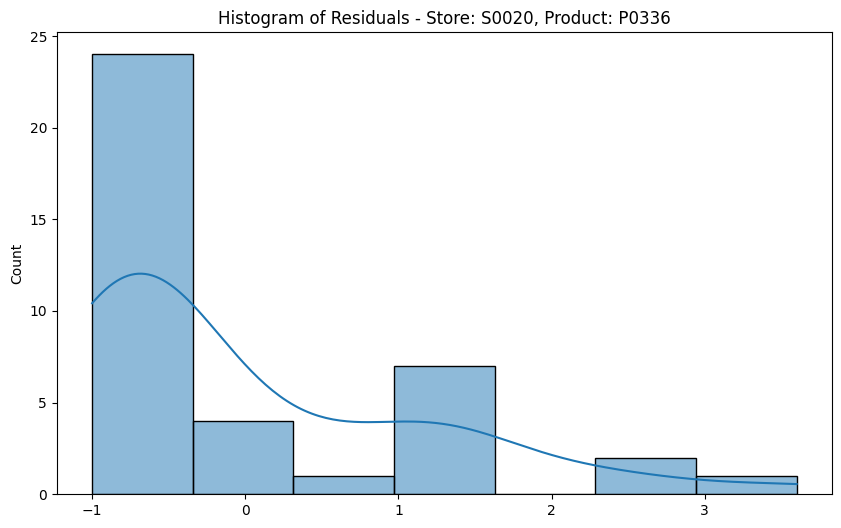

Jarque-Bera test for Store: S0020, Product: P0336
 (14.453070241259626, 0.000727035594646631, 1.3814171075470882, 4.122917704664652)


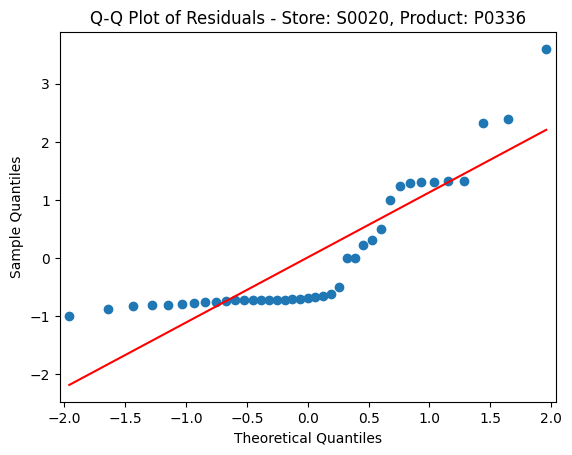

Arch test for Store: S0020, Product: P0336
 (6.285437095394549, 0.5068436279581318, 0.8380492455305606, 0.5669057571781126)


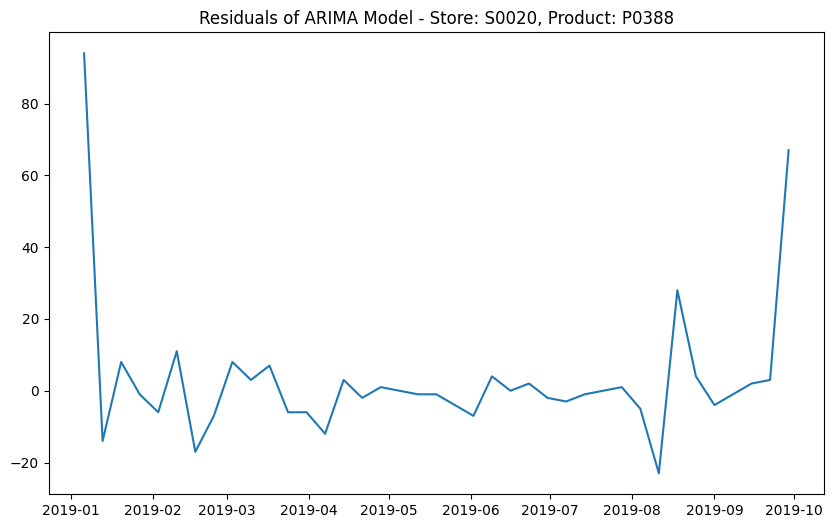

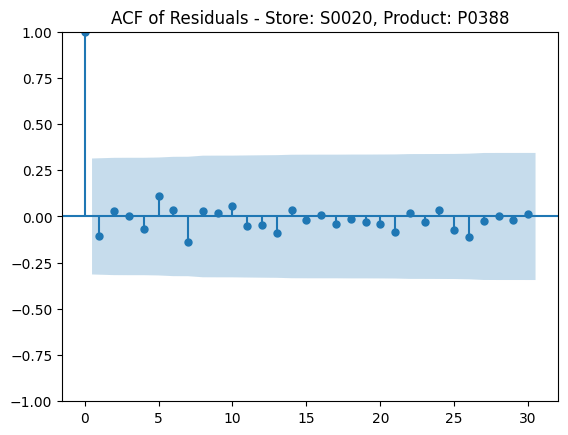

Ljung-Box test for Store: S0020, Product: P0388
      lb_stat  lb_pvalue
10  2.566705   0.989868


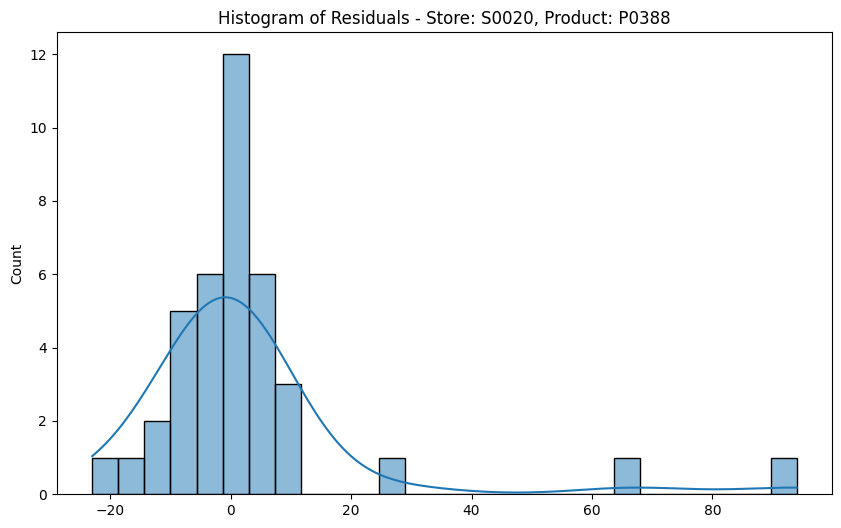

Jarque-Bera test for Store: S0020, Product: P0388
 (258.54348277583415, 7.211009192652848e-57, 3.1776564803947767, 13.89558070405731)


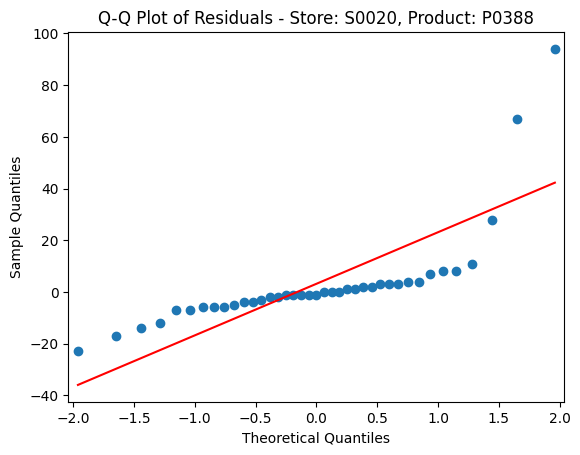

Arch test for Store: S0020, Product: P0388
 (25.282242290897294, 0.0006761388158011909, 12.90340874475642, 8.999696786194358e-07)


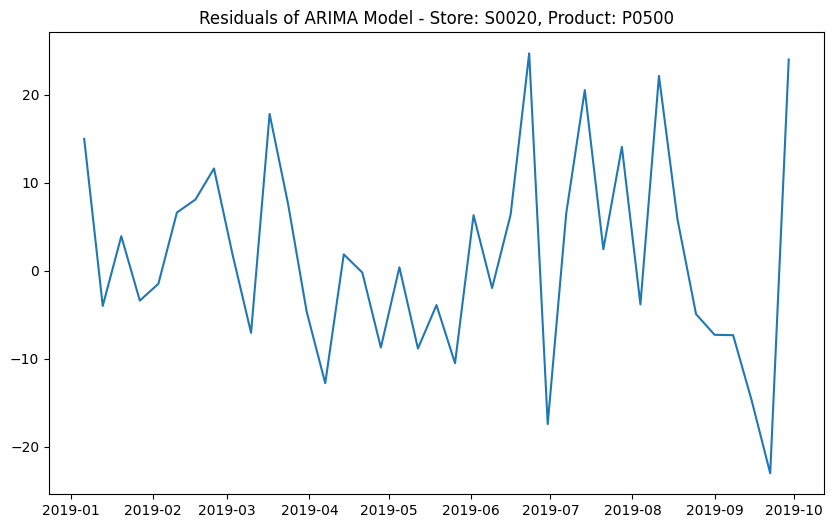

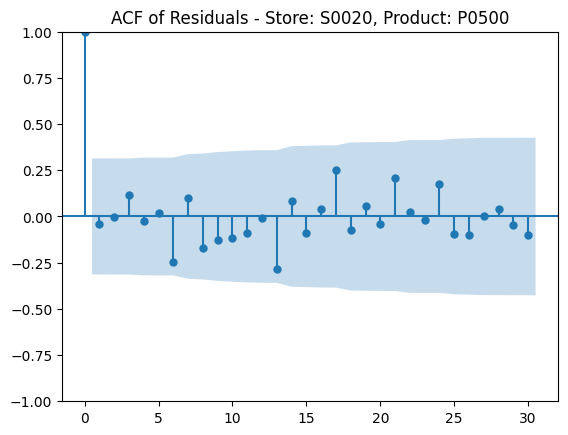

Ljung-Box test for Store: S0020, Product: P0500
      lb_stat  lb_pvalue
10  7.317253   0.695193


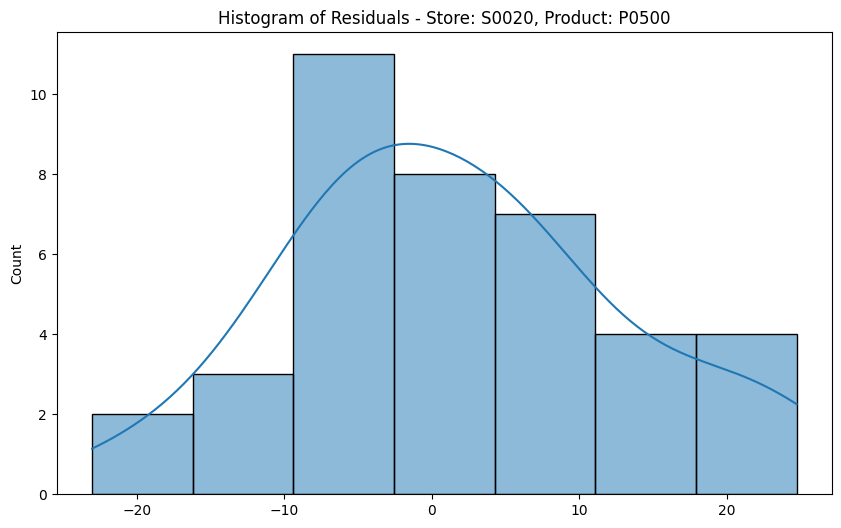

Jarque-Bera test for Store: S0020, Product: P0500
 (0.5993841910279717, 0.741046357055491, 0.24105281180681914, 2.63064112635071)


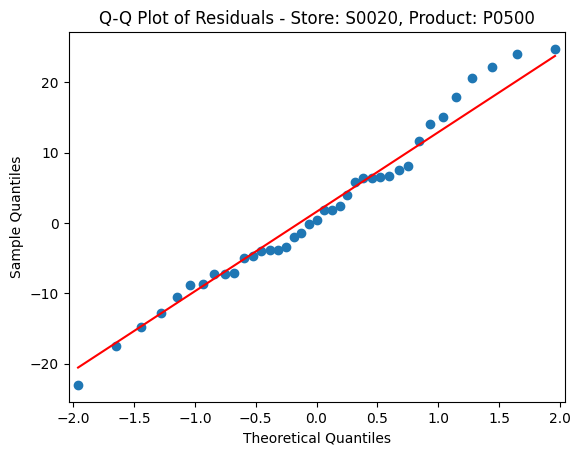

Arch test for Store: S0020, Product: P0500
 (4.974658901785727, 0.6630558626888459, 0.6311103832350167, 0.7255847416829372)


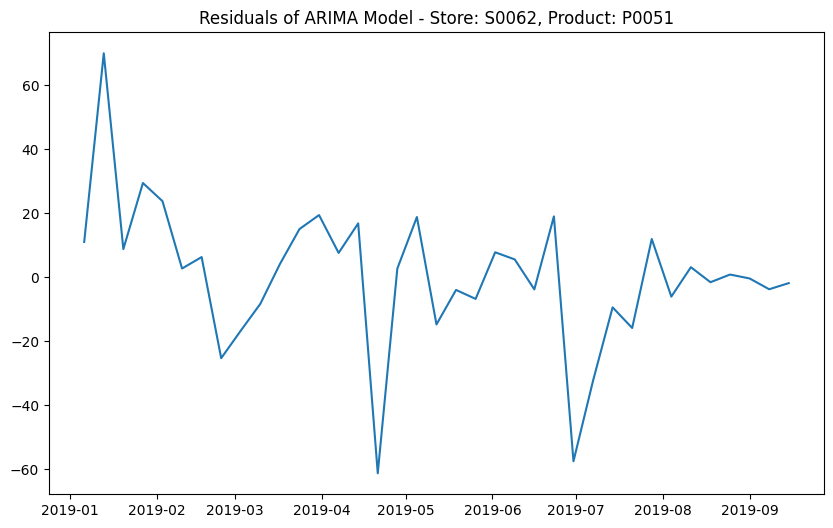

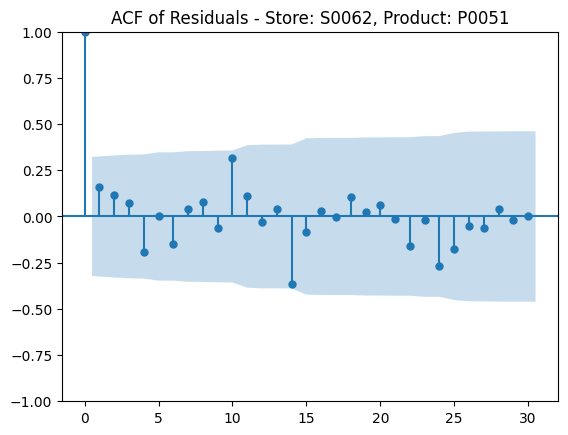

Ljung-Box test for Store: S0062, Product: P0051
       lb_stat  lb_pvalue
10  10.449834   0.401952


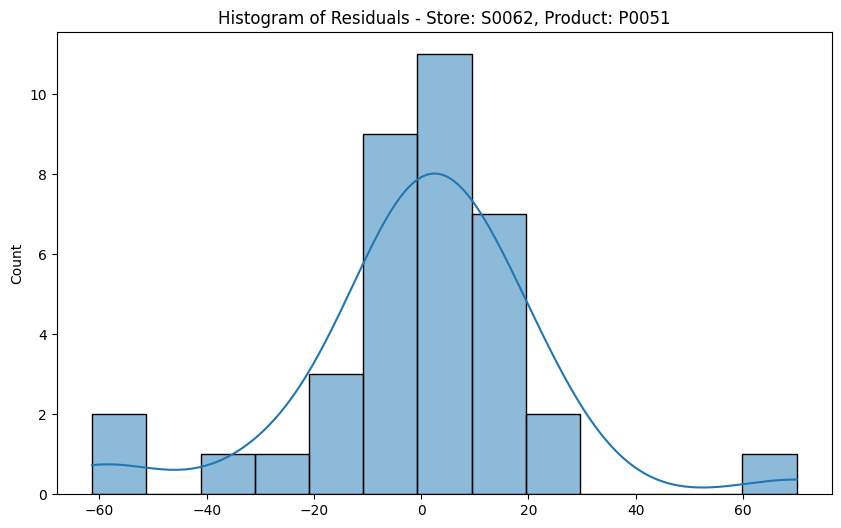

Jarque-Bera test for Store: S0062, Product: P0051
 (12.488798387041676, 0.0019412965711083387, -0.22355934223615742, 5.810858779625144)


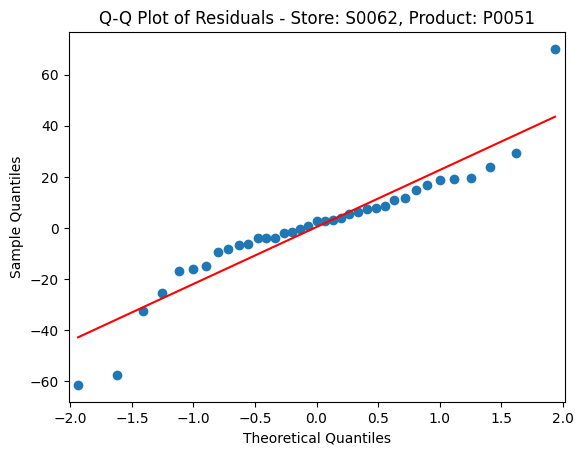

Arch test for Store: S0062, Product: P0051
 (2.5150752204056936, 0.9259576140934834, 0.28759482460521807, 0.951876520207837)


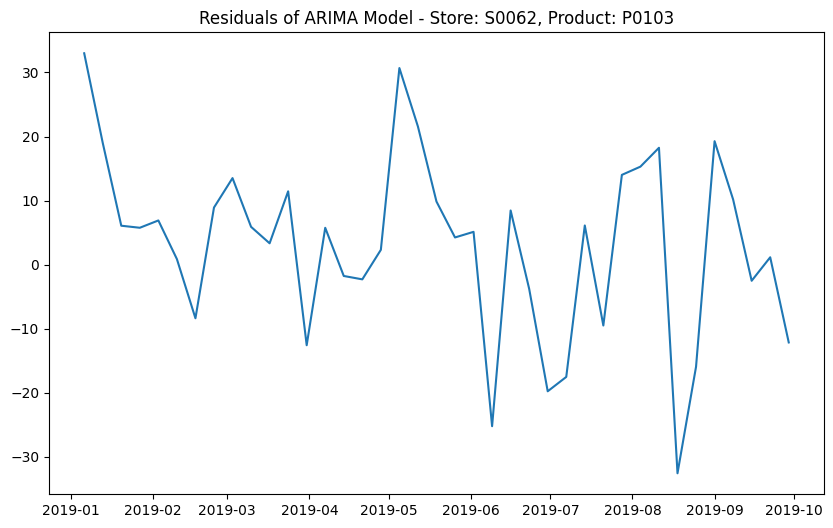

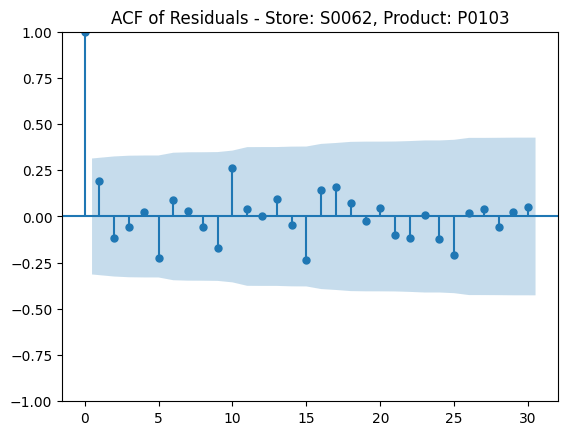

Ljung-Box test for Store: S0062, Product: P0103
       lb_stat  lb_pvalue
10  10.642049   0.386077


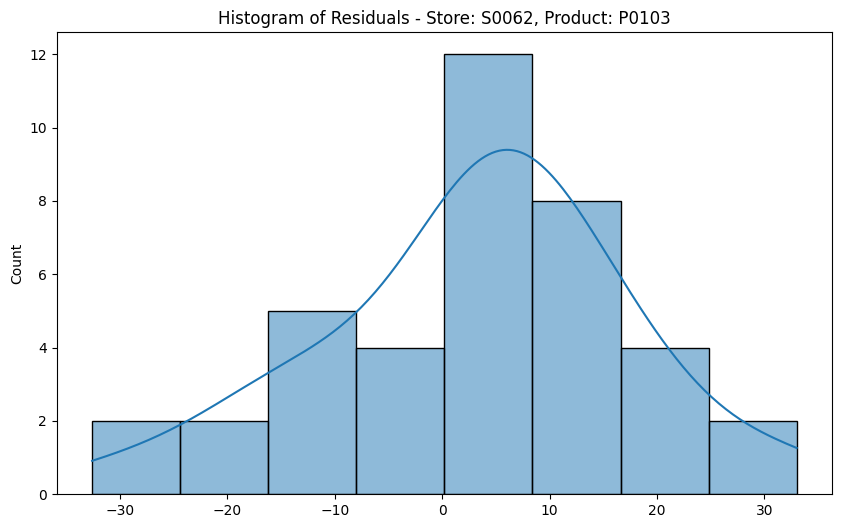

Jarque-Bera test for Store: S0062, Product: P0103
 (0.7845177007966613, 0.6755292303169007, -0.3412534761253387, 3.130247394202985)


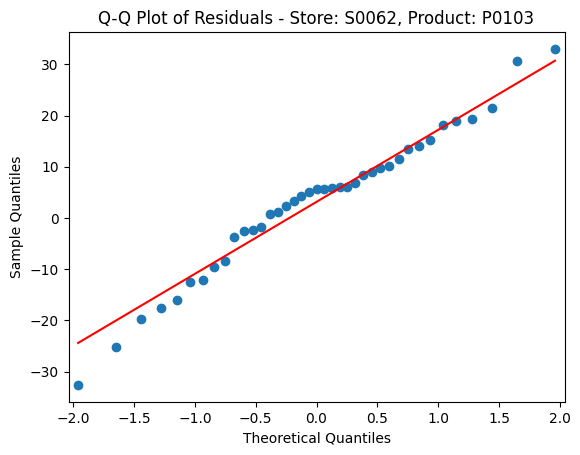

Arch test for Store: S0062, Product: P0103
 (1.9530491098941525, 0.9623931824598615, 0.22285683500035045, 0.9761025234790219)


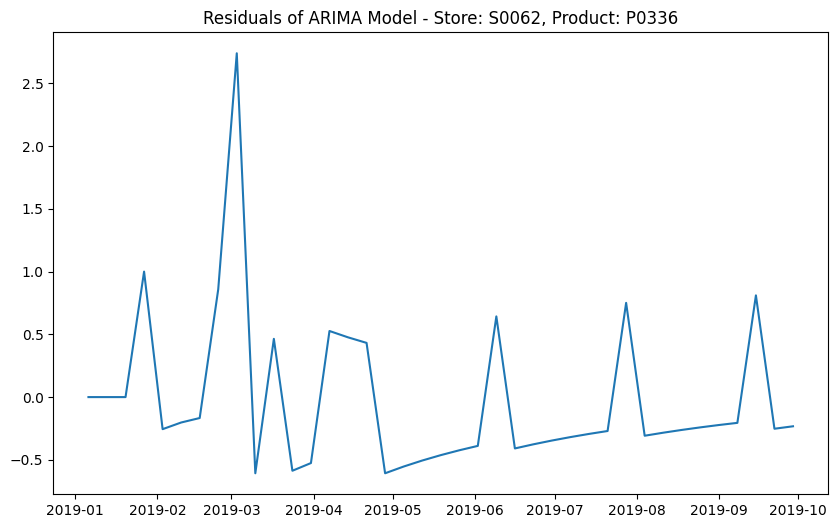

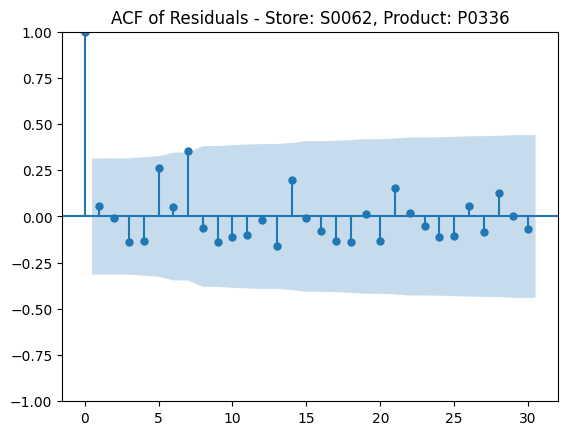

Ljung-Box test for Store: S0062, Product: P0336
       lb_stat  lb_pvalue
10  13.177857   0.213897


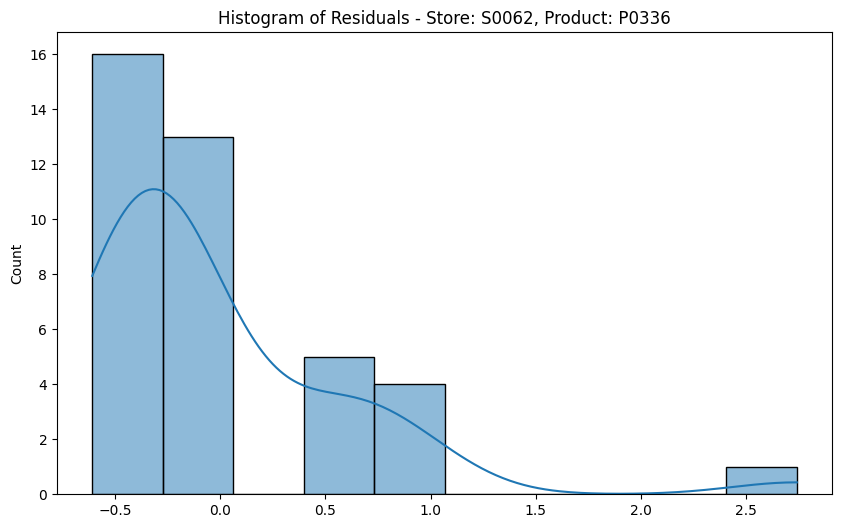

Jarque-Bera test for Store: S0062, Product: P0336
 (111.29545426592853, 6.799847543701841e-25, 2.3216396368390124, 9.85050858726026)


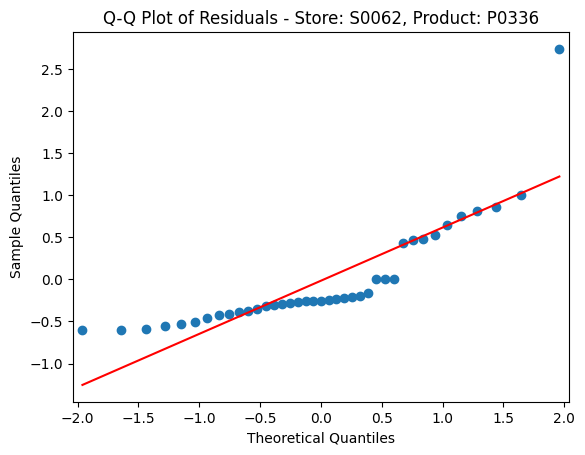

Arch test for Store: S0062, Product: P0336
 (0.8015875080027115, 0.9974277186354764, 0.08809102155896031, 0.9985534233715085)


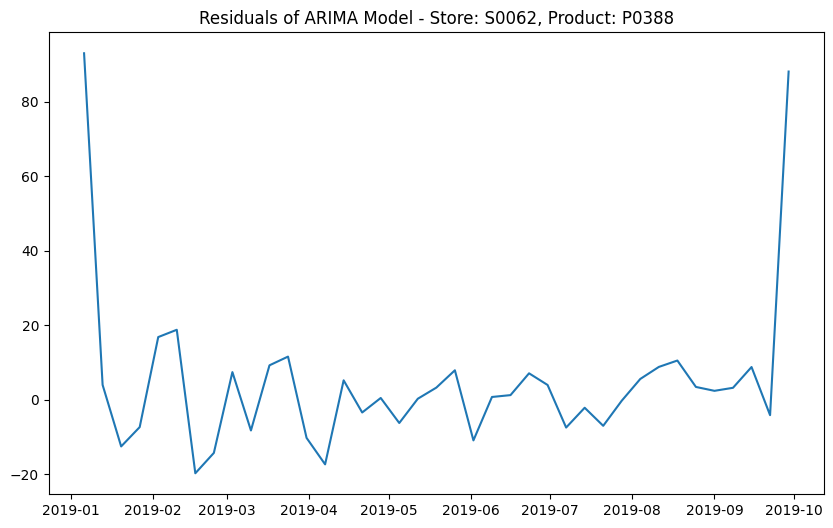

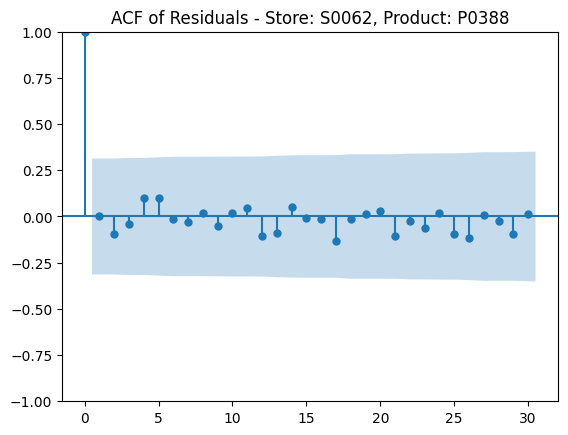

Ljung-Box test for Store: S0062, Product: P0388
      lb_stat  lb_pvalue
10  1.610839   0.998547


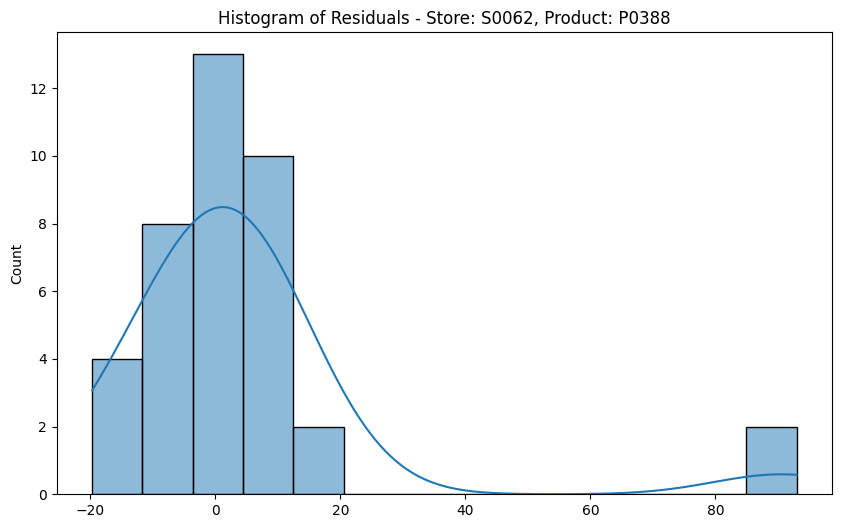

Jarque-Bera test for Store: S0062, Product: P0388
 (205.4032127347289, 2.4960832850730997e-45, 3.006413529086644, 12.499888832824553)


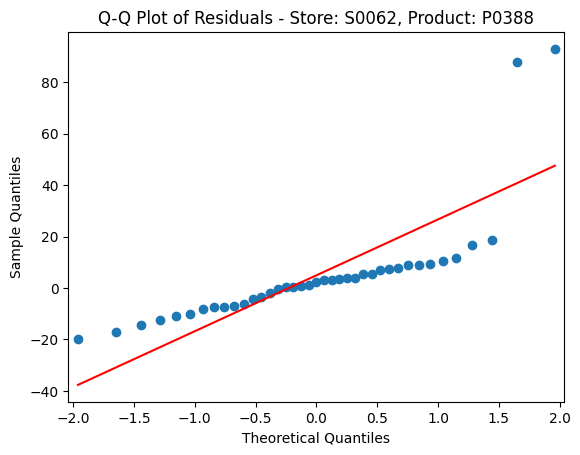

Arch test for Store: S0062, Product: P0388
 (2.087815086057102, 0.9548203927439942, 0.23930793329841768, 0.9709056444594382)


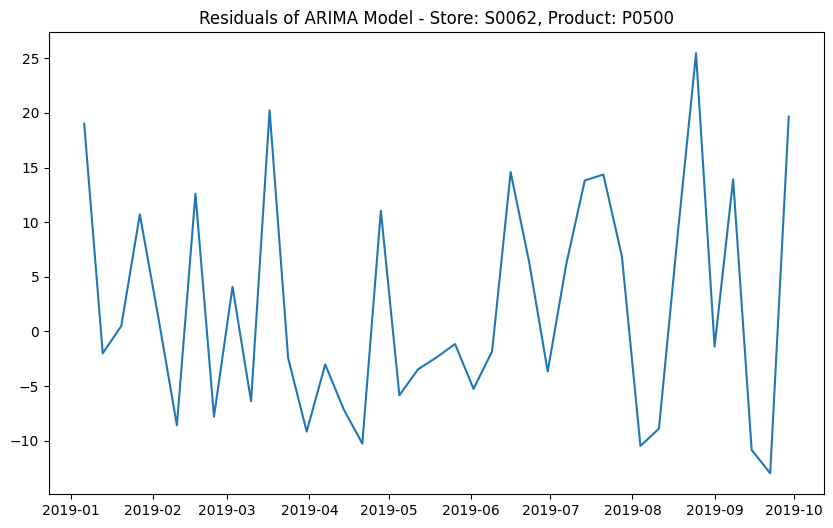

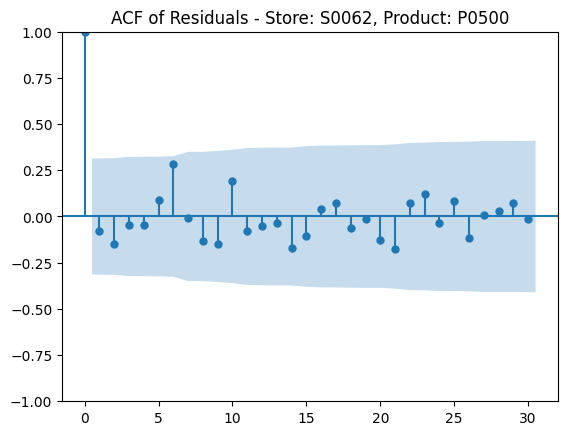

Ljung-Box test for Store: S0062, Product: P0500
     lb_stat  lb_pvalue
10  9.78067   0.459942


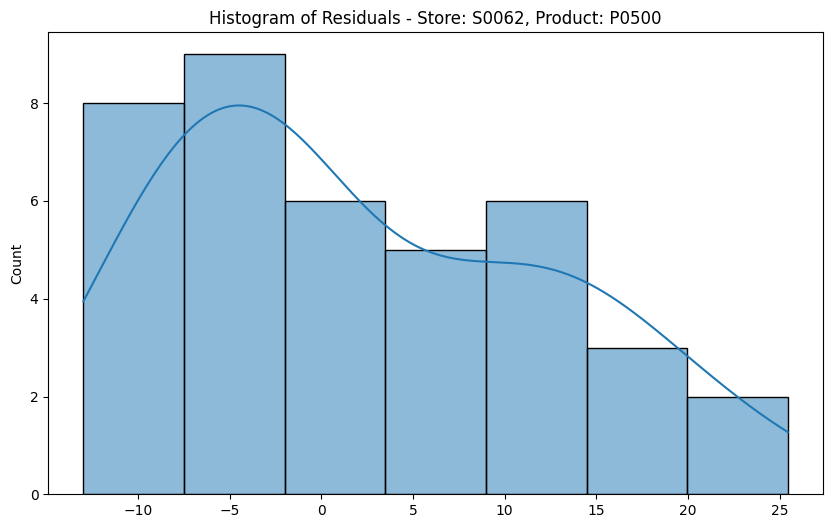

Jarque-Bera test for Store: S0062, Product: P0500
 (2.8689259279598653, 0.23824327488539263, 0.5007439778157567, 2.126779092400128)


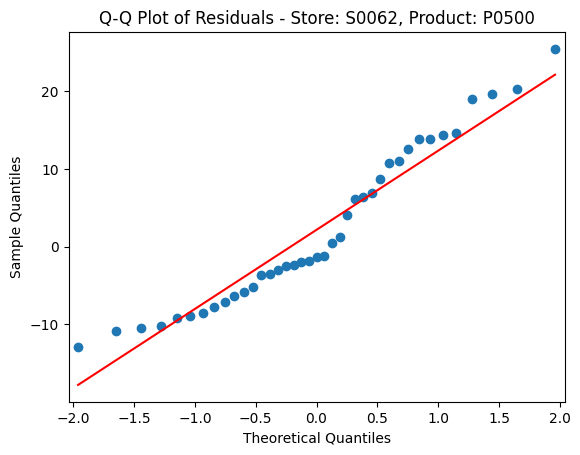

Arch test for Store: S0062, Product: P0500
 (8.92765405109271, 0.2578920275783546, 1.3266574483378917, 0.28088933618584033)


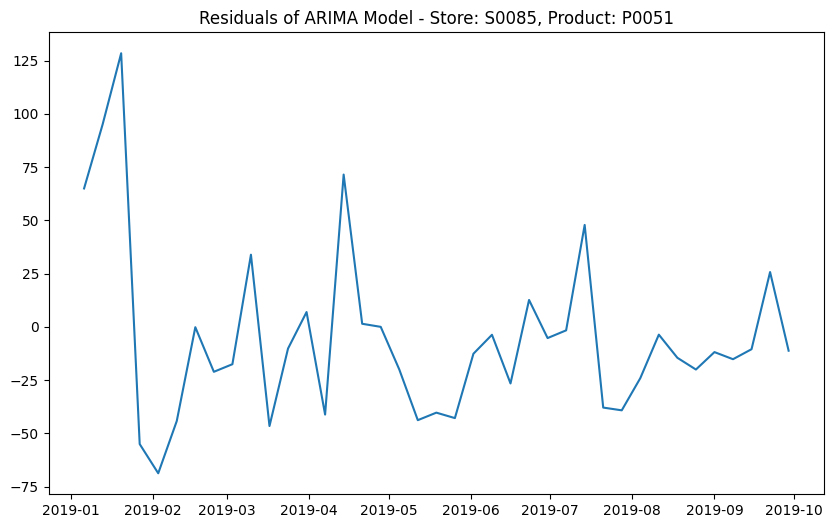

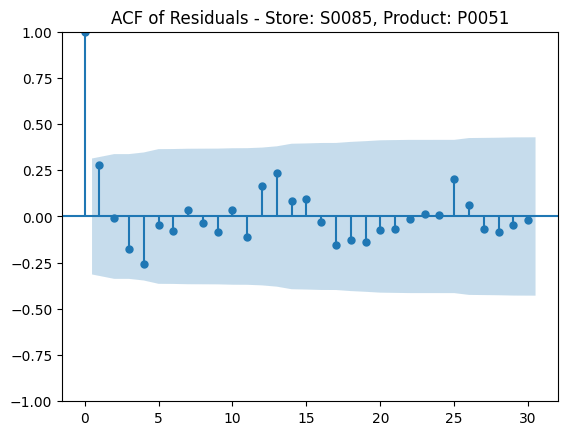

Ljung-Box test for Store: S0085, Product: P0051
      lb_stat  lb_pvalue
10  8.632094   0.567338


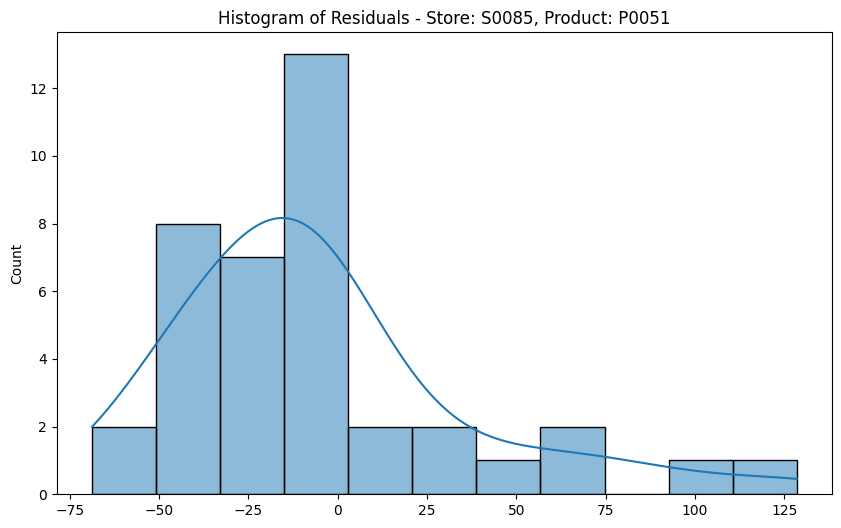

Jarque-Bera test for Store: S0085, Product: P0051
 (19.217567916356405, 6.713641537253863e-05, 1.3921175014057485, 5.018472464502296)


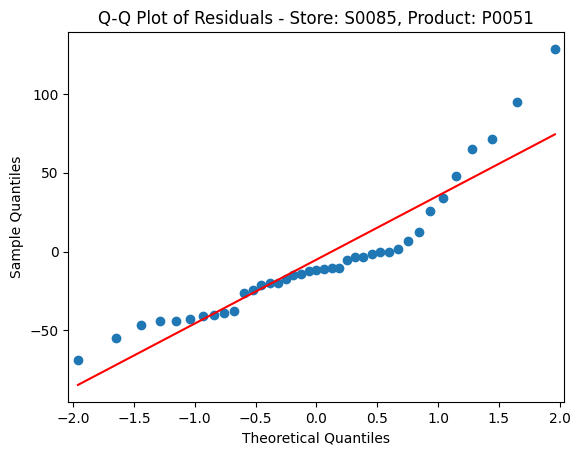

Arch test for Store: S0085, Product: P0051
 (5.371962814390482, 0.6146690716715245, 0.6916829089723899, 0.6782787783260171)


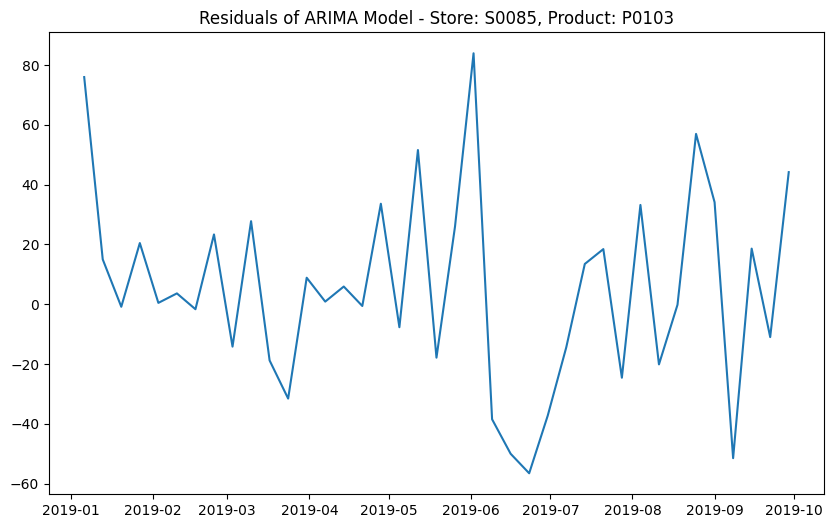

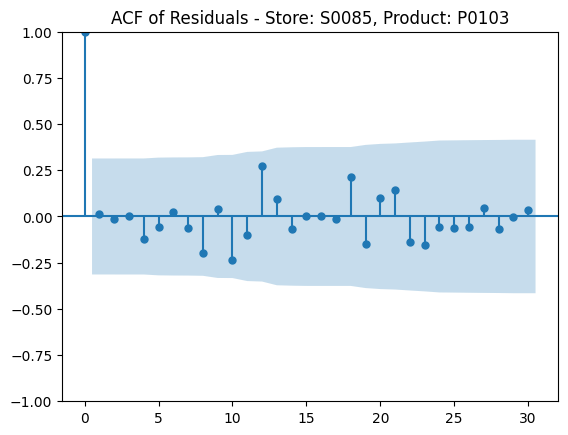

Ljung-Box test for Store: S0085, Product: P0103
      lb_stat  lb_pvalue
10  6.275268    0.79163


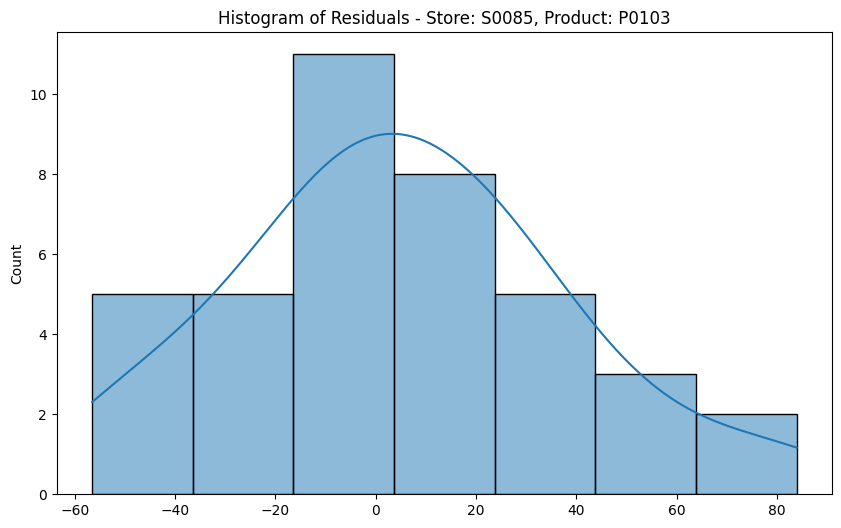

Jarque-Bera test for Store: S0085, Product: P0103
 (0.5203512521982052, 0.7709161809120093, 0.2772519164296674, 2.88712106244652)


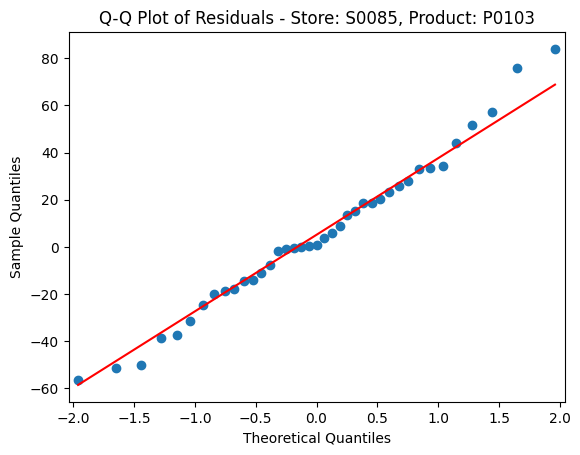

Arch test for Store: S0085, Product: P0103
 (6.599741838243059, 0.4717082147971763, 0.8908447370277623, 0.528888414015414)


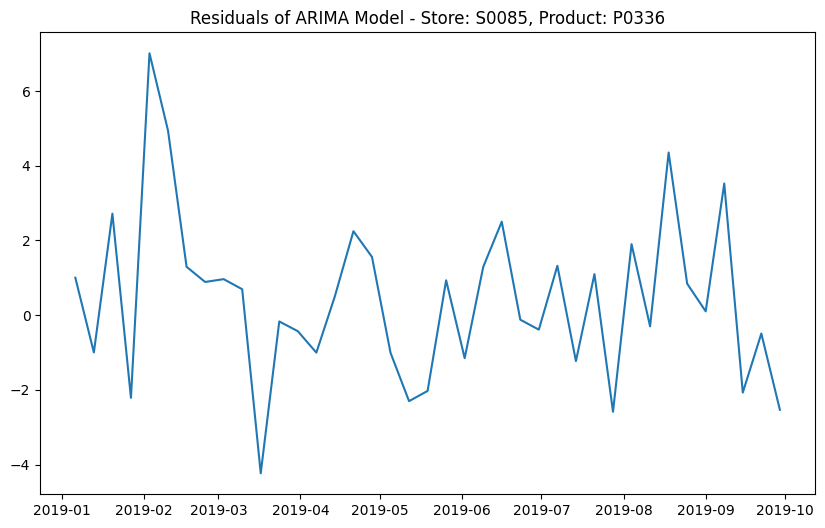

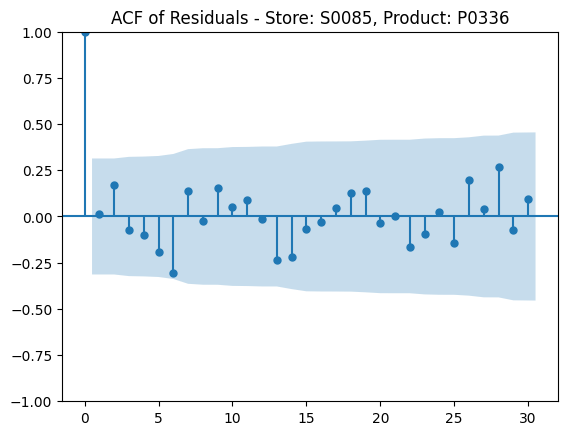

Ljung-Box test for Store: S0085, Product: P0336
       lb_stat  lb_pvalue
10  10.545568   0.393999


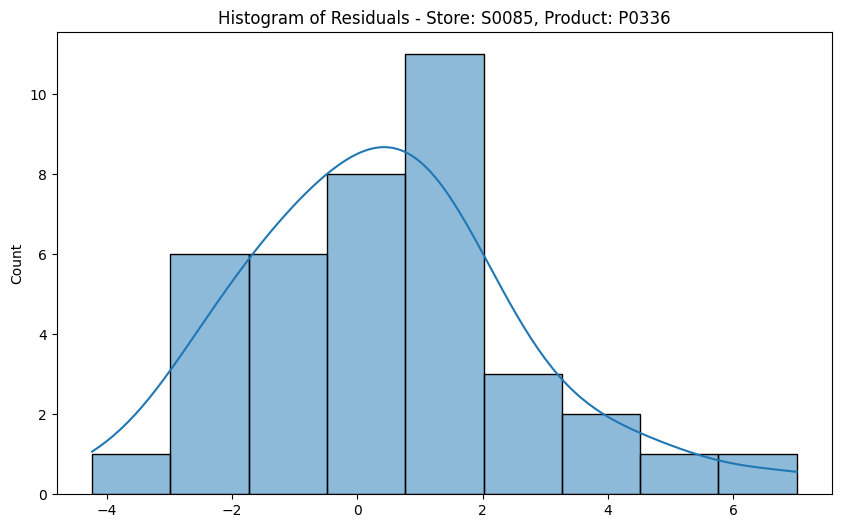

Jarque-Bera test for Store: S0085, Product: P0336
 (3.5739081186328665, 0.16746949573507725, 0.6225260032515865, 3.8057130842348683)


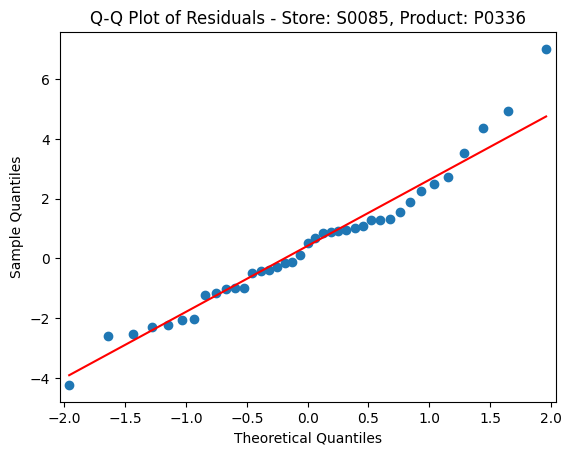

Arch test for Store: S0085, Product: P0336
 (13.464531850098968, 0.06156714929606783, 2.4905823164000203, 0.04498278592537912)


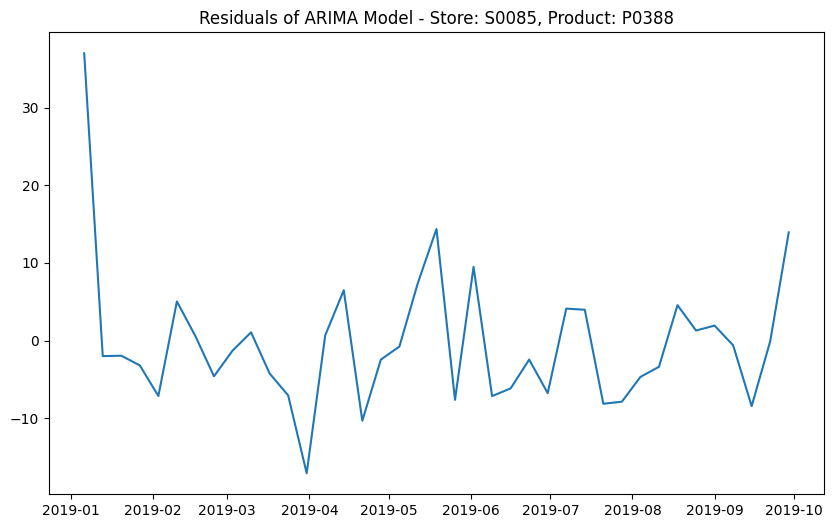

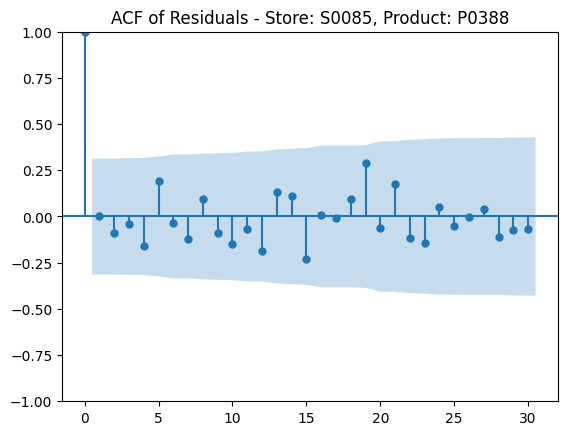

Ljung-Box test for Store: S0085, Product: P0388
      lb_stat  lb_pvalue
10  6.175135   0.800341


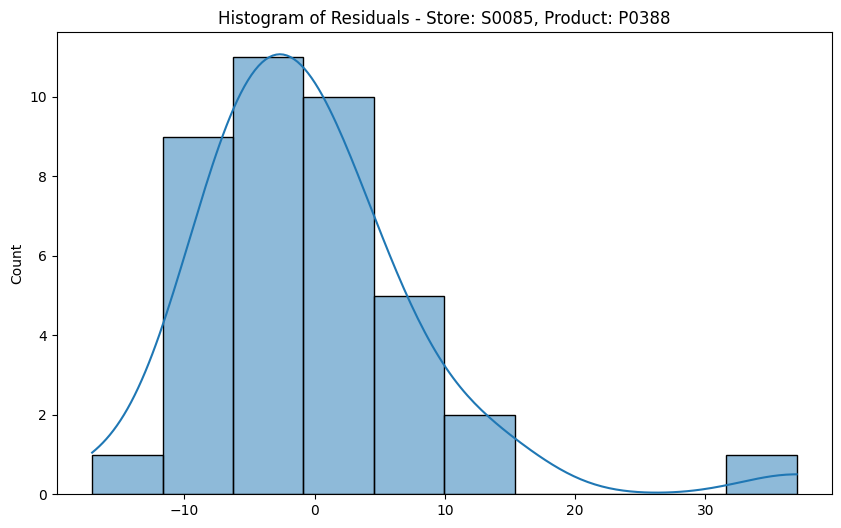

Jarque-Bera test for Store: S0085, Product: P0388
 (85.38690084656704, 2.8738895139140583e-19, 1.9120570017465068, 9.158079020655515)


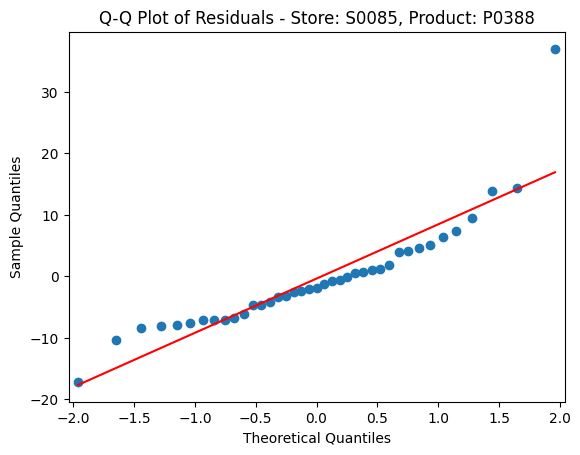

Arch test for Store: S0085, Product: P0388
 (2.321977052754278, 0.9398956473820266, 0.2682477938312479, 0.9604085955230766)


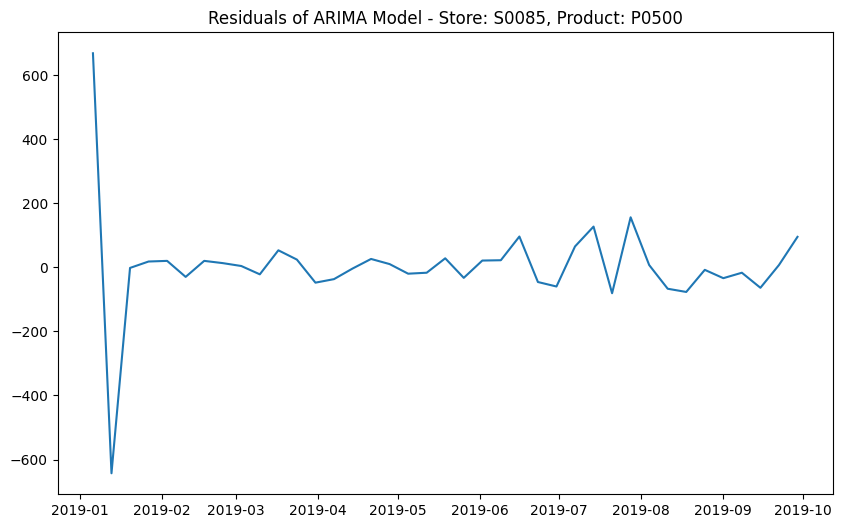

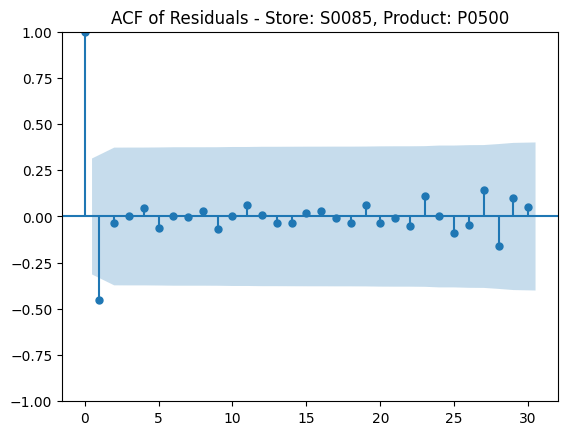

Ljung-Box test for Store: S0085, Product: P0500
      lb_stat  lb_pvalue
10  9.260556   0.507567


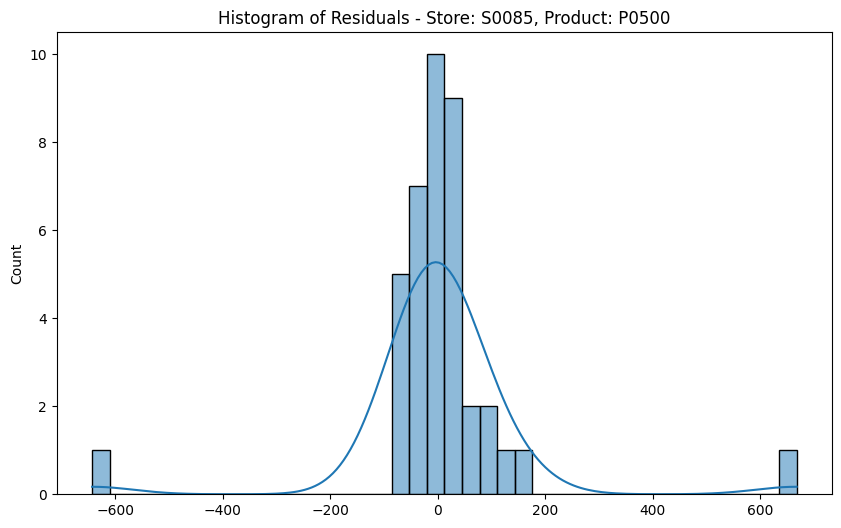

Jarque-Bera test for Store: S0085, Product: P0500
 (256.0183553825013, 2.5487104271642593e-56, 0.16863105446884394, 15.54735077330419)


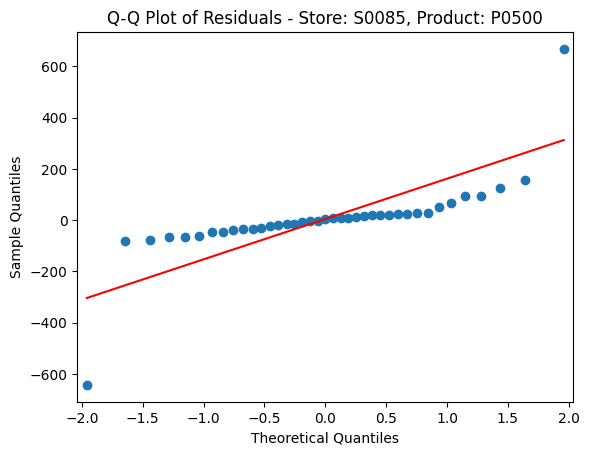

Arch test for Store: S0085, Product: P0500
 (7.803106164895702, 0.3502757314853035, 1.1056587276610523, 0.39130219308845493)


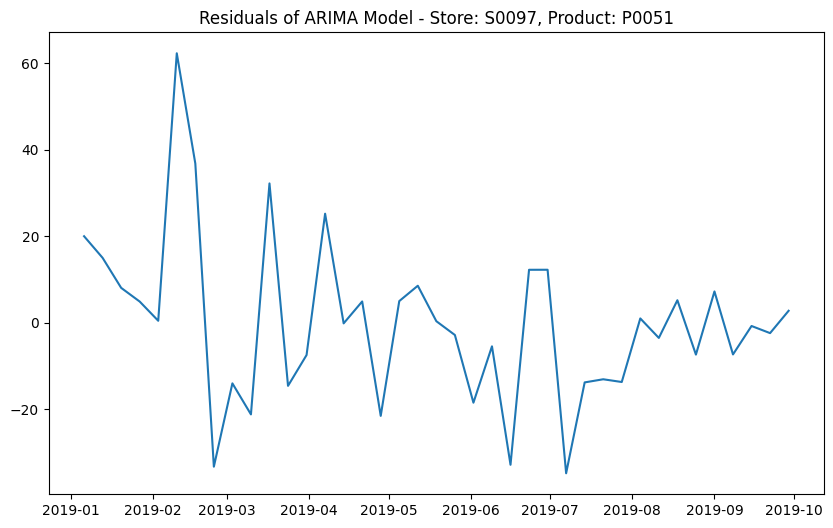

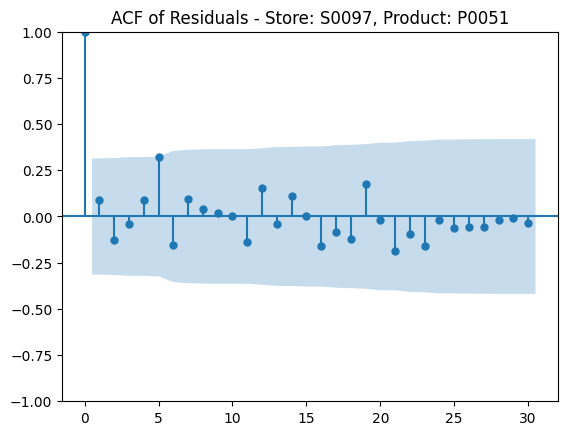

Ljung-Box test for Store: S0097, Product: P0051
      lb_stat  lb_pvalue
10  8.106965   0.618389


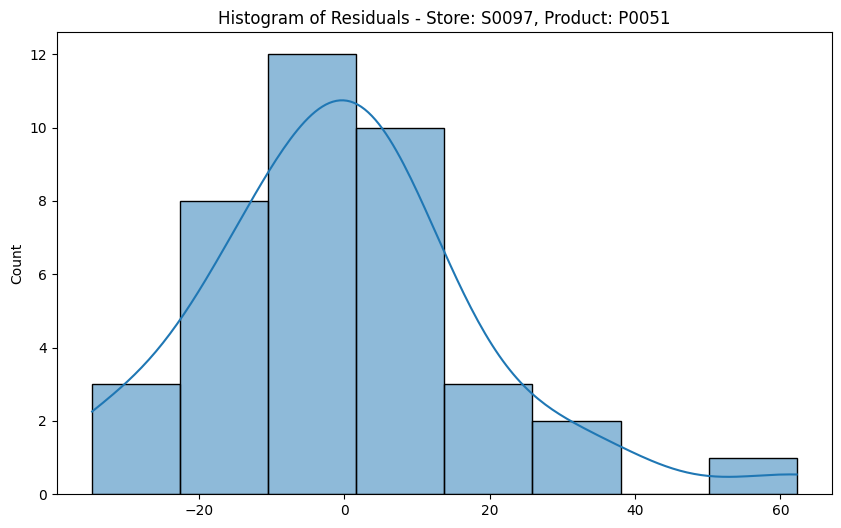

Jarque-Bera test for Store: S0097, Product: P0051
 (8.519127589078112, 0.01412846397935374, 0.785869068479518, 4.664986271308517)


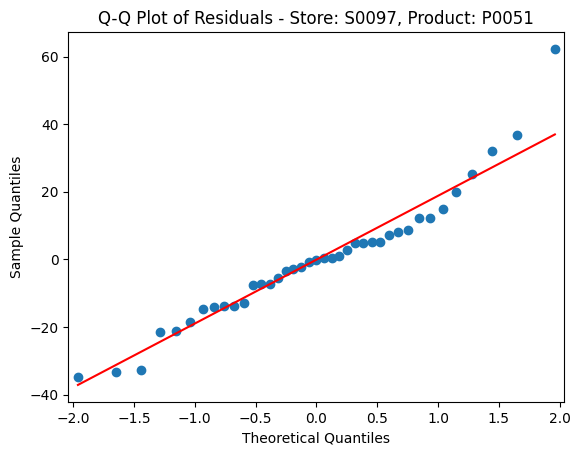

Arch test for Store: S0097, Product: P0051
 (8.881507123993714, 0.26127571935773486, 1.3171655146941756, 0.2850045198992368)


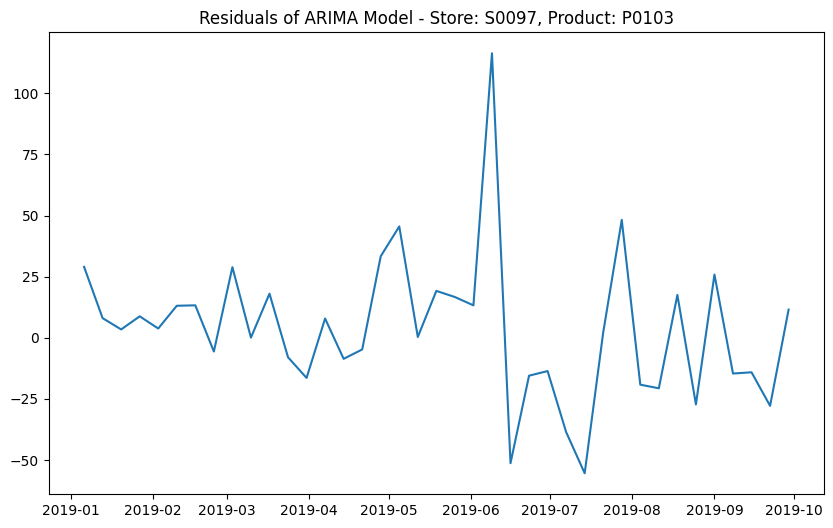

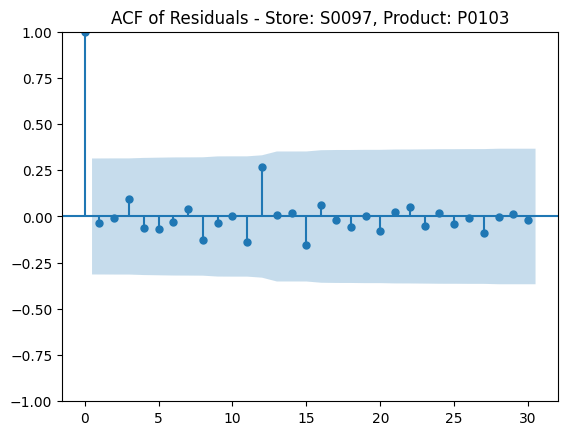

Ljung-Box test for Store: S0097, Product: P0103
     lb_stat  lb_pvalue
10  1.82986   0.997486


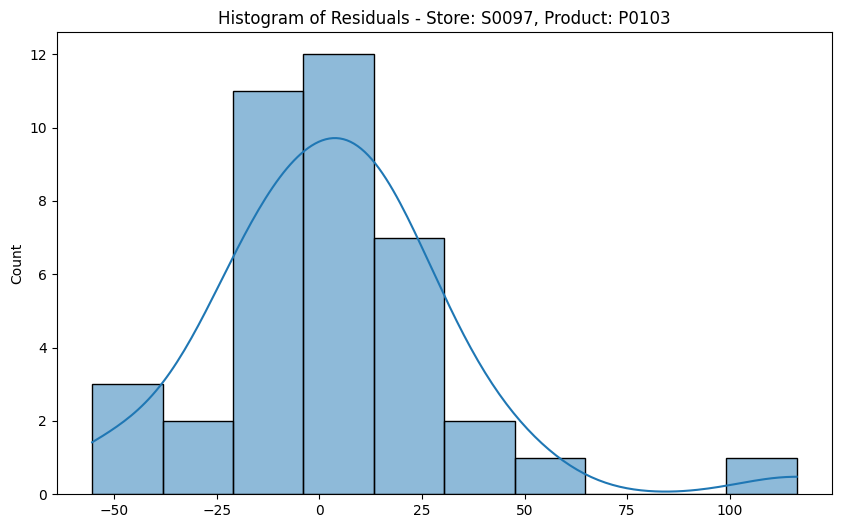

Jarque-Bera test for Store: S0097, Product: P0103
 (30.783569226432554, 2.0674398155919376e-07, 1.1098552947722078, 6.7438776431980605)


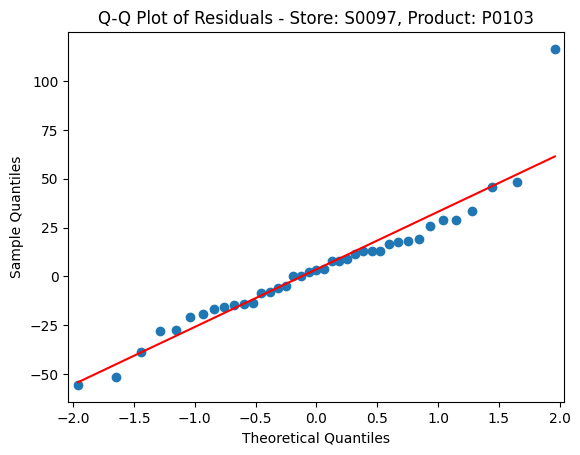

Arch test for Store: S0097, Product: P0103
 (2.4713261436037186, 0.9292407130039078, 0.2869454364204689, 0.9527280112434113)


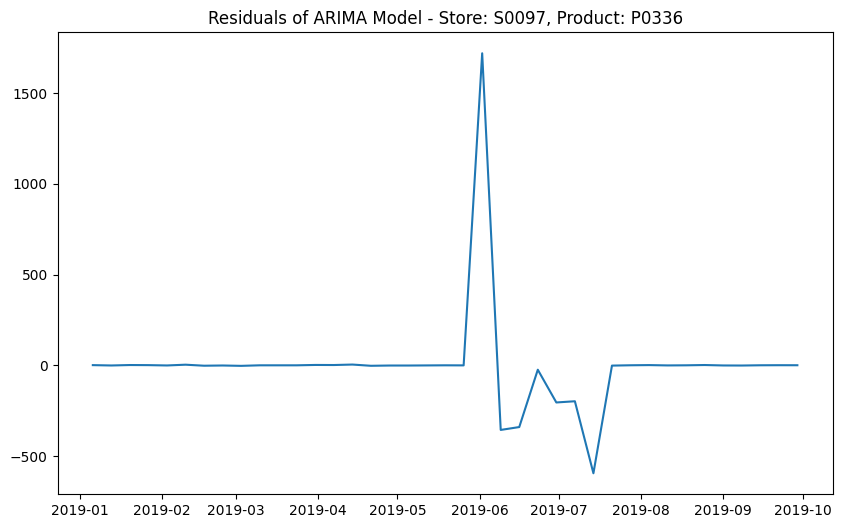

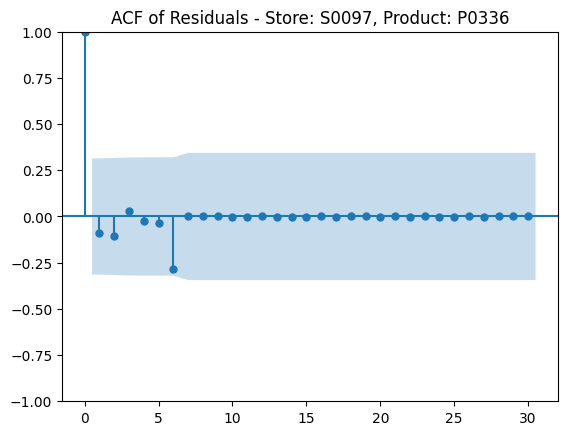

Ljung-Box test for Store: S0097, Product: P0336
      lb_stat  lb_pvalue
10  4.788585   0.904846


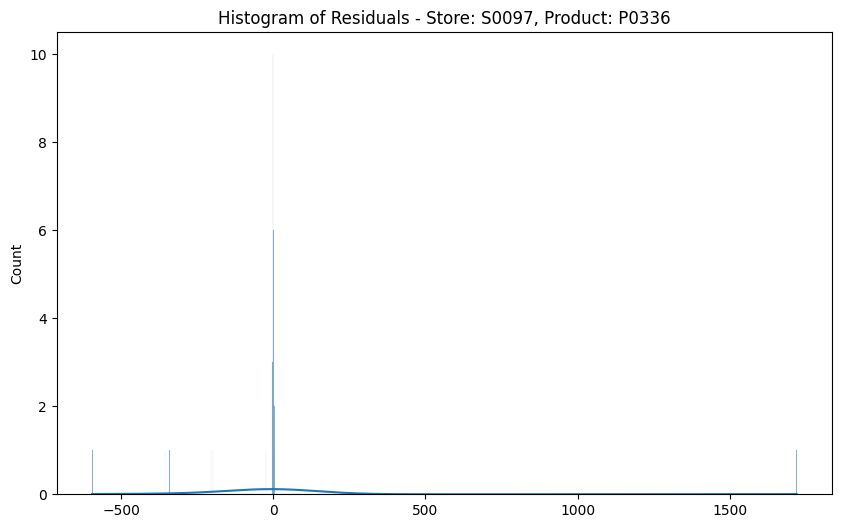

Jarque-Bera test for Store: S0097, Product: P0336
 (999.833719912844, 7.742234308397406e-218, 4.300046216941599, 26.266299647898453)


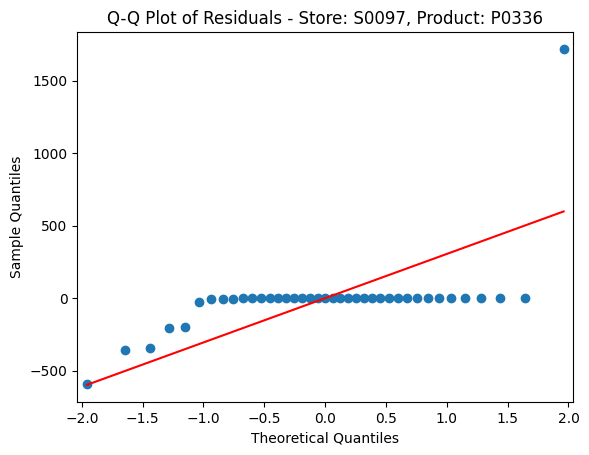

Arch test for Store: S0097, Product: P0336
 (0.3803593434479282, 0.9997774437452777, 0.04124301068758419, 0.9998807582353041)


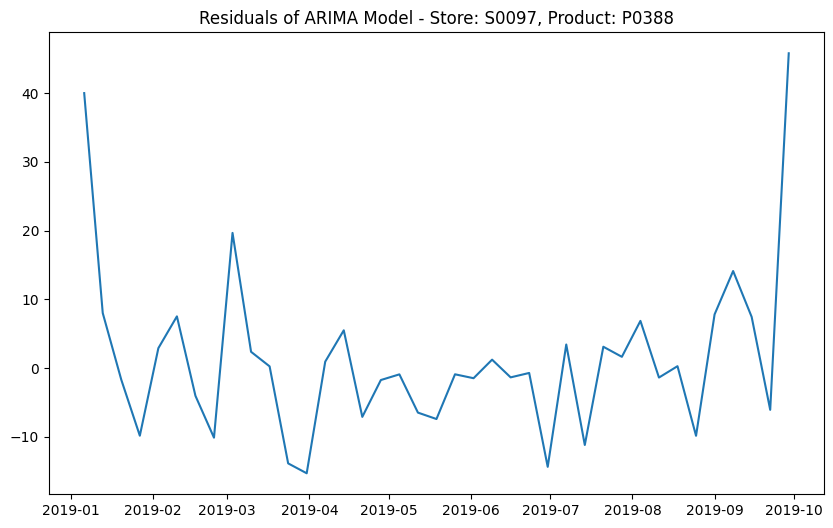

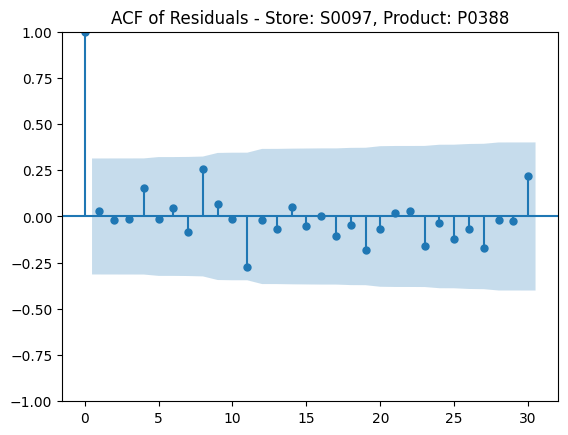

Ljung-Box test for Store: S0097, Product: P0388
      lb_stat  lb_pvalue
10  5.258053   0.873287


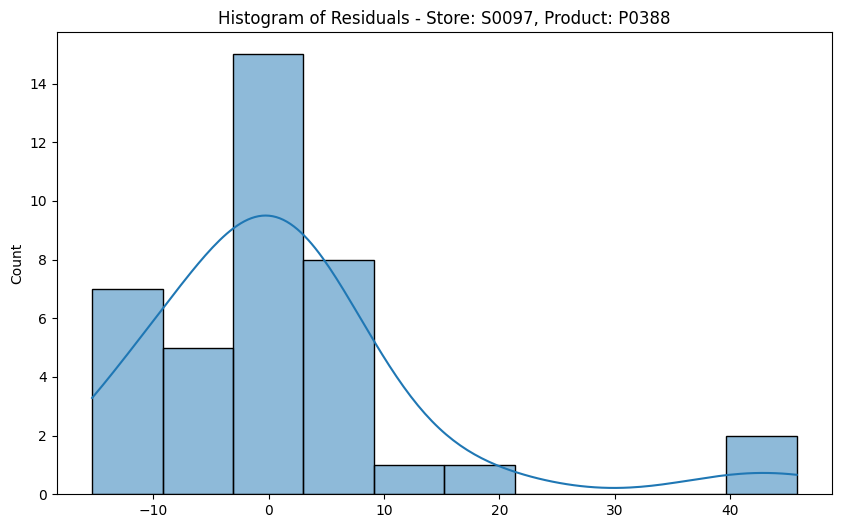

Jarque-Bera test for Store: S0097, Product: P0388
 (56.04967986478274, 6.744762491630037e-13, 1.8786740290210386, 7.513806182895714)


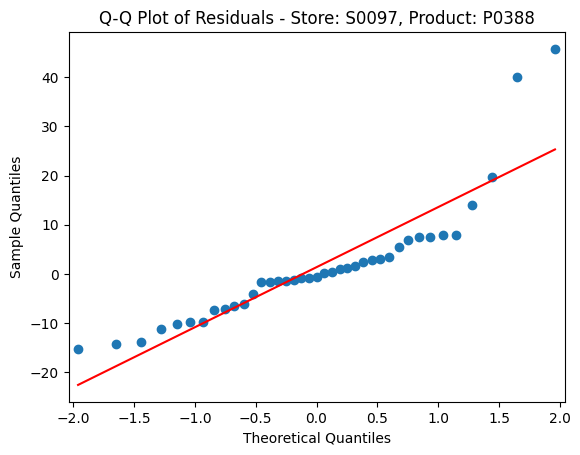

Arch test for Store: S0097, Product: P0388
 (4.307647860981753, 0.743738541638838, 0.5333269744067491, 0.8006260423365016)


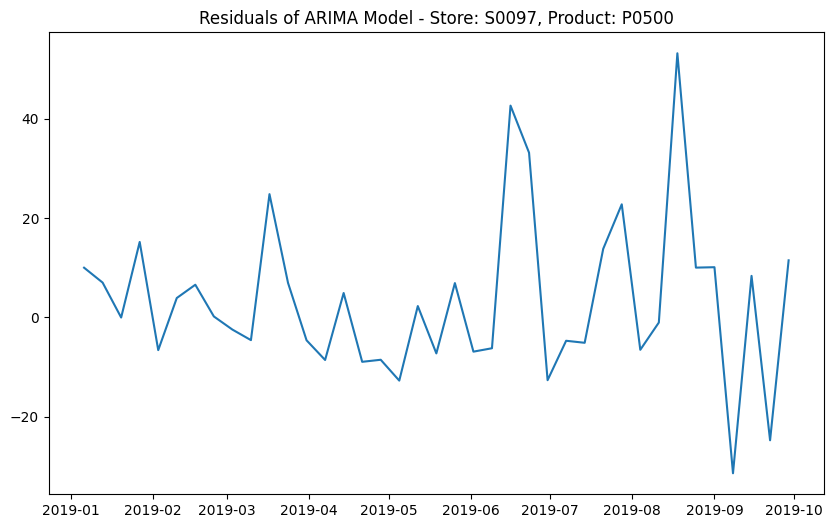

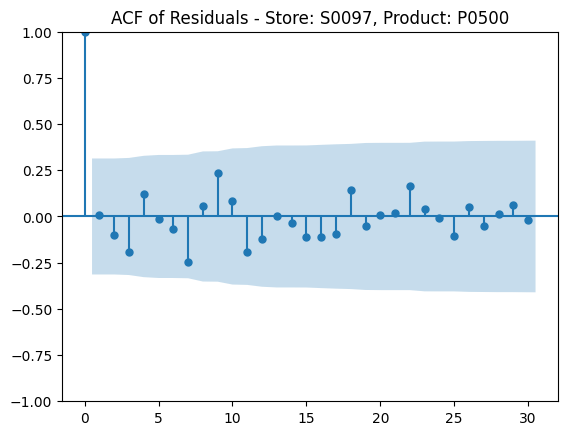

Ljung-Box test for Store: S0097, Product: P0500
      lb_stat  lb_pvalue
10  9.683147   0.468718


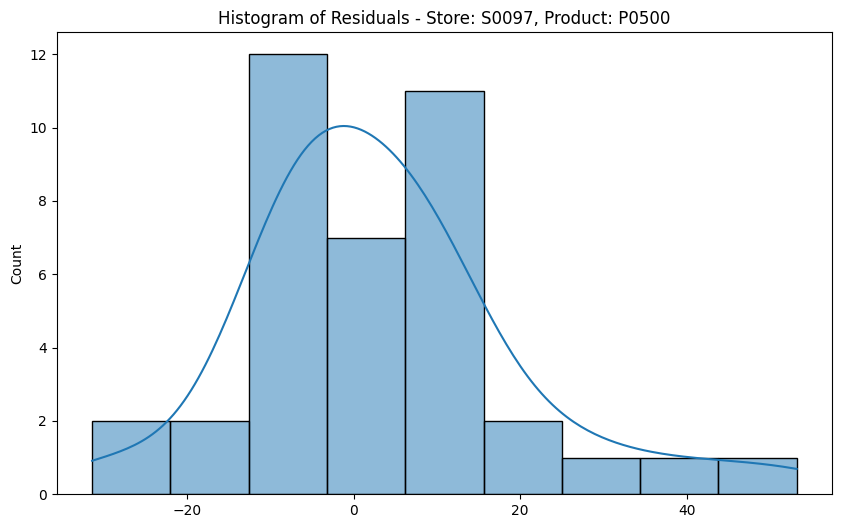

Jarque-Bera test for Store: S0097, Product: P0500
 (9.807704595052853, 0.007417951800873086, 0.9114283169023788, 4.647028904611729)


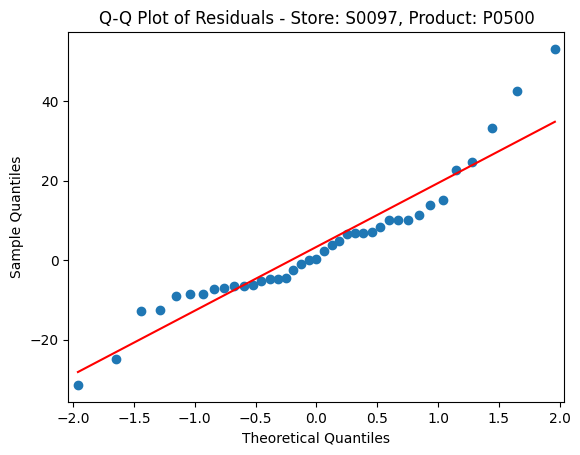

Arch test for Store: S0097, Product: P0500
 (2.4393383940117914, 0.9315952571580577, 0.2829248558033603, 0.9544378624071767)


In [7]:
import warnings
import pandas as pd
from itertools import product
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.stats.stattools import jarque_bera
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns

# Function to perform grid search for ARIMA parameters
def optimize_arima(series, p_values, d_value, q_values):
    best_aic = float("inf")
    best_order = None
    best_model = None
    for p, q in product(p_values, q_values):
        try:
            model = ARIMA(series, order=(p, d_value, q))
            model_fit = model.fit()
            aic = model_fit.aic
            if aic < best_aic:
                best_aic = aic
                best_order = (p, d_value, q)
                best_model = model_fit
        except:
            continue
    return best_order, best_model

# Function to calculate metrics
def calculate_metrics(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, forecast)
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    return mse, rmse, mae, mape

# DataFrames to store results
df_forecasts = pd.DataFrame(columns=['store_id', 'product_id', 'forecast_week_1', 'forecast_week_2', 'forecast_week_3', 'ARIMA'])
df_product_error = pd.DataFrame(columns=['store_id', 'product_id', 'error_message'])
df_metrics = pd.DataFrame(columns=['store_id', 'product_id', 'mse', 'rmse', 'mae', 'mape'])

# Grid search parameters
p_values = range(0, 3)
d_value = 1
q_values = range(0, 3)

# Iterate over each group
for (store_id, product_id), group in grouped:
    # Reindex to ensure complete weekly intervals
    group = group.asfreq('W-SUN', method='pad')
    
    # Ensure there are enough data points to fit the model
    if len(group) < 6:  # Need at least 6 data points to train and test
        df_product_error = pd.concat([df_product_error, pd.DataFrame([{
            'store_id': store_id,
            'product_id': product_id,
            'error_message': 'Not enough data points to fit ARIMA model'
        }])], ignore_index=True)
        continue
    
    warnings.filterwarnings("ignore")  # specify to ignore warning messages

    # Fit ARIMA model
    try:
        best_order, best_model = optimize_arima(group['sales'], p_values, d_value, q_values)
       
        if best_model is not None:
            # Forecast future sales (next 3 weeks)
            forecast = best_model.forecast(steps=3)
            actual = group['sales'][-3:].values  # Last 3 actual sales values
            
            # Calculate metrics
            mse, rmse, mae, mape = calculate_metrics(actual, forecast)
            
            # Append the forecast and metrics to the DataFrames
            df_forecasts = pd.concat([df_forecasts, pd.DataFrame([{
                'store_id': store_id,
                'product_id': product_id,
                'forecast_week_1': forecast[0],
                'forecast_week_2': forecast[1],
                'forecast_week_3': forecast[2],
                'ARIMA': best_order
            }])], ignore_index=True)
            
            df_metrics = pd.concat([df_metrics, pd.DataFrame([{
                'store_id': store_id,
                'product_id': product_id,
                'mse': mse,
                'rmse': rmse,
                'mae': mae,
                'mape': mape
            }])], ignore_index=True)
            
            # Residuals analysis
            residuals = best_model.resid
            
            # Plotting residuals
            plt.figure(figsize=(10, 6))
            plt.plot(residuals)
            plt.title(f'Residuals of ARIMA Model - Store: {store_id}, Product: {product_id}')
            plt.show()
            
            # ACF of residuals
            plot_acf(residuals, lags=30)
            plt.title(f'ACF of Residuals - Store: {store_id}, Product: {product_id}')
            plt.show()
            
            # Ljung-Box Test
            lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
            print(f'Ljung-Box test for Store: {store_id}, Product: {product_id}\n', lb_test)
            
            # Histogram of residuals
            plt.figure(figsize=(10, 6))
            sns.histplot(residuals, kde=True)
            plt.title(f'Histogram of Residuals - Store: {store_id}, Product: {product_id}')
            plt.show()
            
            # Jarque-Bera Test
            jb_test = jarque_bera(residuals)
            print(f'Jarque-Bera test for Store: {store_id}, Product: {product_id}\n', jb_test)
            
            # Q-Q Plot
            qqplot(residuals, line='s')
            plt.title(f'Q-Q Plot of Residuals - Store: {store_id}, Product: {product_id}')
            plt.show()
            
            # Arch Test for heteroscedasticity
            arch_test = het_arch(residuals)
            print(f'Arch test for Store: {store_id}, Product: {product_id}\n', arch_test)
            
        else:
            df_product_error = pd.concat([df_product_error, pd.DataFrame([{
                'store_id': store_id,
                'product_id': product_id,
                'error_message': 'Failed to find suitable ARIMA model'
            }])], ignore_index=True)
    except Exception as e:
        print(f"Error fitting ARIMA for Store: {store_id}, Product: {product_id}")
        print(str(e))
        df_product_error = pd.concat([df_product_error, pd.DataFrame([{
            'store_id': store_id,
            'product_id': product_id,
            'error_message': str(e)
        }])], ignore_index=True)

# Save the DataFrames to CSV files
df_product_error.to_csv('product_errors_arima.csv', index=False)
df_metrics.to_csv('metrics_results_arima.csv', index=False)
df_forecasts.to_csv('forecasts_arima.csv', index=False)
